In [1]:
include("simple_sn.jl")
using Main.SNetwork

In [2]:
using Statistics, PyPlot

In [3]:
using MLDatasets

Load train & test data

In [4]:
(train_x, train_y) =  FashionMNIST.traindata()
train_xf = collect(FashionMNIST.convert2features(train_x)')
train_yc = to_categorical(train_y);

In [5]:
(test_x, test_y) =  FashionMNIST.testdata()
test_xf = collect(FashionMNIST.convert2features(test_x)')
test_yc = to_categorical(test_y);

In [6]:
n_inputs = size(test_xf,2)
n_hidden = 500
n_output = size(test_yc,2)

10

In [7]:
shape = [n_inputs, n_hidden, n_output]

3-element Array{Int64,1}:
 784
 500
  10

In [8]:
network = Network(shape, 0.0, 1.0, 5)

Network(Dict(4 => [0; 0; … ; 0; 0],2 => [0; 0; … ; 0; 0],3 => [0; 0; … ; 0; 0],1 => [0; 0; … ; 0; 0]), Dict(2 => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0],3 => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0],1 => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]), Dict{Int64,Array{#s1,2} where #s1<:Real}(2 => [0.0; 0.0; … ; 0.0; 0.0],3 => [0.0; 0.0; … ; 0.0; 0.0],1 => [-1.0; -1.0; … ; -1.0; -1.0]), Dict{Tuple{Int64,Int64},Array{#s2,2} where #s2<:Real}((1, 2) => [-0.4742997798412215 -0.8491496916891318 … 1.6088815256898745 -0.09523829858488114; -0.7717766388281633 -0.5687147475951362 … -0.8406805096099143 0.08708252802976328; … ; 0.09785406805409395 -1.208162374369294 … -0.9988298724131944 -0.03658003906562564; -0.16979234118701414 0.6460960880816974 … 0.20121667167669538 -0.8472644482977133],(2, 3) => [0.7191356244019858 0.8176604325097667 … -0.44119234161830934 -0.11117105505549106; -1.2394368268085658 1.3094722360615605 … -0.9273445520464294 0.47184309841334604; … ; -0.1311527

In [9]:
network.thresholds[2] = 0.9
network.thresholds[3] = 0.025 * n_hidden

12.5

In [10]:
network.learn_rate

0.0005

In [11]:
err = @time train_batch(network, train_xf, train_yc, 50, 1000, 50)

3055.698643 seconds (213.22 M allocations: 3.693 TiB, 3.15% gc time)


1000-element Array{Float64,1}:
 14.652029194592187  
  4.186407840845369  
  3.3939996719937664 
  5.816230094718582  
  1.9613493741090906 
  2.0651697614060085 
  1.9465173395369757 
  1.077507998477893  
  1.9997279515647113 
  1.1477929047347069 
  1.9301459279037678 
  1.2327956249230676 
  1.3739776150607796 
  ⋮                  
  0.1005814747095312 
  0.06432903113829265
  0.08068637038690314
  0.0935064672056205 
  0.10328275085939248
  0.09248201025590318
  0.12477249044516073
  0.16598227128590376
  0.07482589543141809
  0.17606210740583342
  0.2676758672024262 
  0.13972110370289317

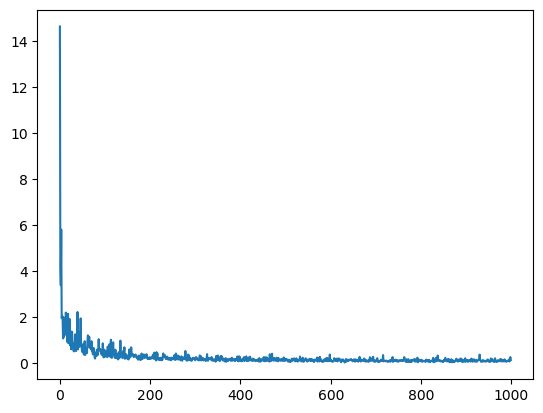

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0f257084e0>

In [13]:
plot(err)

In [14]:
accuracy(network, test_xf, test_yc, 50)

0.7598

In [16]:
network.learn_rate = 0.0001

0.0001

In [ ]:
err2 = @time train_batch(network, train_xf, train_yc, 50, 500, 50)

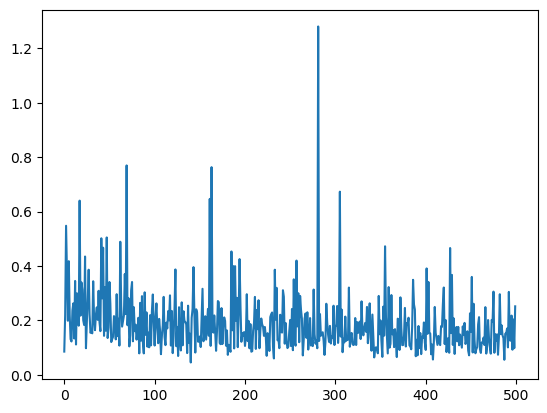

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0f256a1eb8>

In [18]:
plot(err2)

In [19]:
accuracy(network, test_xf, test_yc, 50)

0.7753